#**FIRST_TEST**

#

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define column names for the MONK's dataset
columns = ["class", "a1", "a2", "a3", "a4", "a5", "a6", "id"]

def load_monks_data(filename):
    # Read the file, handling irregular whitespace
    df = pd.read_csv(filename, sep=' ', skipinitialspace=True, names=columns)
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    X = df.drop(columns=['class'])
    y = df['class']
    return X, y

In [46]:
def visualize_results(results_df, title):
    # 1. Prepare Data for Plotting
    # Convert tuples like (5, 5) to strings "(5, 5)" so they can be categorical labels
    plot_df = results_df.copy()
    plot_df['Hidden Layers'] = plot_df['param_hidden_layer_sizes'].astype(str)
    plot_df['Alpha'] = plot_df['param_alpha']
    plot_df['Accuracy'] = plot_df['mean_test_score']

    # 2. Heatmap Plot
    #plt.figure(figsize=(10, 6))
    #pivot_table = plot_df.pivot(index='Hidden Layers', columns='Alpha', values='Accuracy')
    #sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
    #plt.title(f'{title}: Accuracy Heatmap')
    #plt.show()

    # 3. Line Plot (Compare parameters)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=plot_df, x='Alpha', y='Accuracy', hue='Hidden Layers', marker='o')
    plt.xscale('log') # Log scale because alphas vary by powers of 10
    plt.title(f'{title}: Accuracy vs Alpha')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.show()

In [36]:
# [cite_start]Load the datasets [cite: 36, 1]
X_train_raw, y_train = load_monks_data('monks-1.train')
X_test_raw, y_test = load_monks_data('monks-1.test')

print(f"Loaded {len(X_train_raw)} training samples and {len(X_test_raw)} test samples.")

Loaded 124 training samples and 432 test samples.


In [37]:
# Create the encoder
# sparse_output=False gives us a standard numpy array we can read easily
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both sets
X_train = encoder.fit_transform(X_train_raw)
X_test = encoder.transform(X_test_raw)

print(f"Feature shape after encoding: {X_train.shape}")

Feature shape after encoding: (124, 17)


Starting Grid Search... this may take a moment.

Best Parameters found:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 84.43%


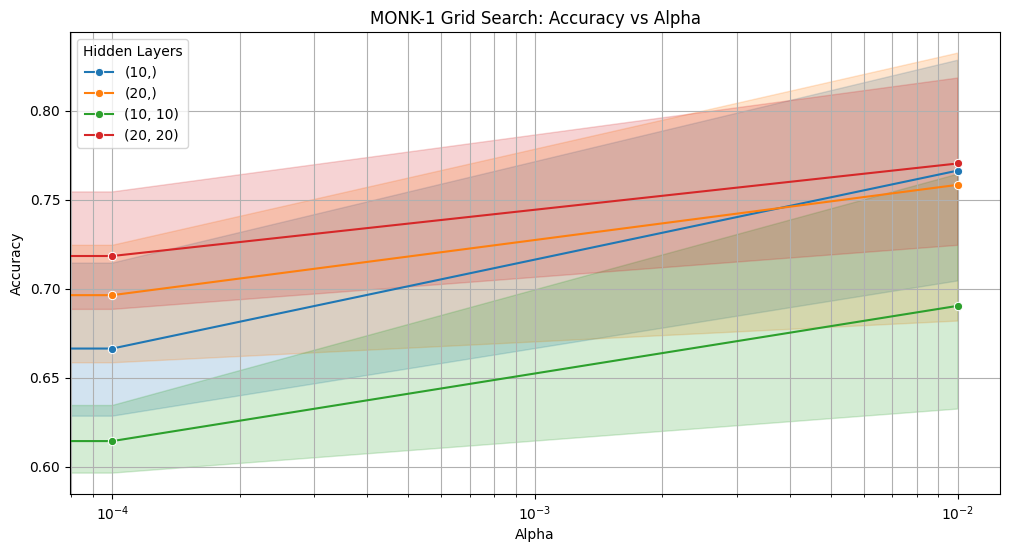

In [48]:
# 1. Define the model (base settings)
mlp = MLPClassifier(max_iter=3000, random_state=42)

# 2. Define the grid of parameters to test
# Note: 'lbfgs' is often best for this specific dataset, but we test others to be sure.
# We include alpha=0 to allow the model to overfit the logical rule if necessary.
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10), (20, 20)],
    'activation': ['relu', 'tanh'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0, 0.0001, 0.01],
}

# 3. Initialize GridSearchCV
# cv=5: uses 5-fold cross-validation
# n_jobs=-1: uses all available CPU cores
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

print("Starting Grid Search... this may take a moment.")
grid_search.fit(X_train, y_train)

print("\nBest Parameters found:")
print(grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2%}")

visualize_results(pd.DataFrame(grid_search.cv_results_), "MONK-1 Grid Search")

In [40]:
# Use the best model found to predict on the test set
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train, best_model.predict(X_train))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 100.00%
Train Set Accuracy: 100.00%


#**2ND_TEST**

In [41]:
# [cite_start]Load the datasets [cite: 36, 1]
X_train_raw_2, y_train_2 = load_monks_data('monks-2.train')
X_test_raw_2, y_test_2 = load_monks_data('monks-2.test')

print(f"Loaded {len(X_train_raw_2)} training samples and {len(X_test_raw_2)} test samples.")

Loaded 169 training samples and 432 test samples.


In [42]:
# Create the encoder
# sparse_output=False gives us a standard numpy array we can read easily
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both sets
X_train_2 = encoder.fit_transform(X_train_raw_2)
X_test_2 = encoder.transform(X_test_raw_2)

print(f"Feature shape after encoding: {X_train_2.shape}")

Feature shape after encoding: (169, 17)


Starting Grid Search... this may take a moment.

Best Parameters found:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 100.00%


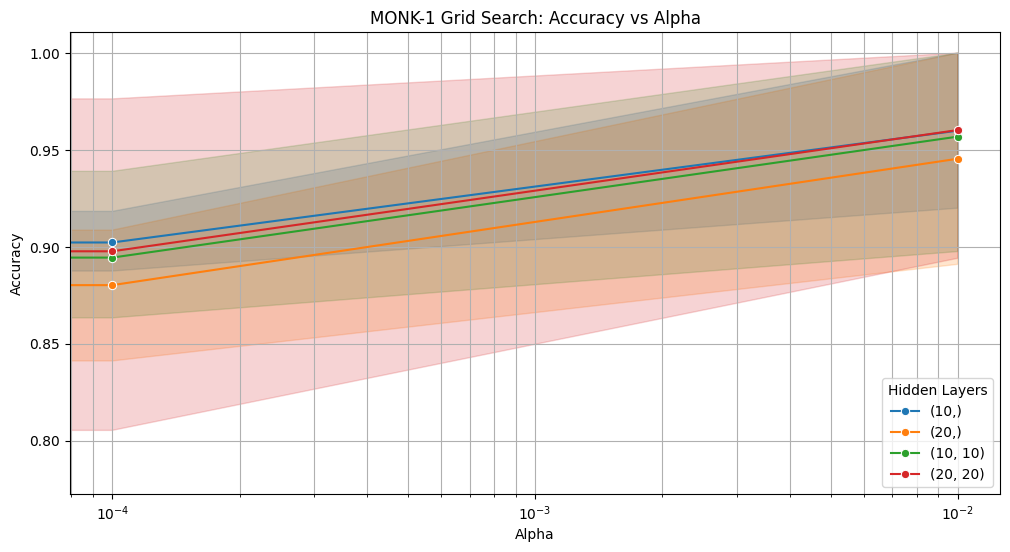

In [49]:
# 3. Initialize GridSearchCV
# cv=5: uses 5-fold cross-validation
# n_jobs=-1: uses all available CPU cores
grid_search_2 = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

print("Starting Grid Search... this may take a moment.")
grid_search_2.fit(X_train_2, y_train_2)

print("\nBest Parameters found:")
print(grid_search_2.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_2.best_score_:.2%}")

visualize_results(pd.DataFrame(grid_search_2.cv_results_), "MONK-2 Grid Search")

In [50]:
# Use the best model found to predict on the test set
best_model_2 = grid_search_2.best_estimator_
test_predictions_2 = best_model_2.predict(X_test_2)
test_acc = accuracy_score(y_test_2, test_predictions_2)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train_2, best_model_2.predict(X_train_2))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 100.00%
Train Set Accuracy: 100.00%


#**LAST_TEST**

In [51]:
# [cite_start]Load the datasets [cite: 36, 1]
X_train_raw_3, y_train_3 = load_monks_data('monks-3.train')
X_test_raw_3, y_test_3 = load_monks_data('monks-3.test')

print(f"Loaded {len(X_train_raw_3)} training samples and {len(X_test_raw_3)} test samples.")

Loaded 122 training samples and 432 test samples.


In [52]:
# Create the encoder
# sparse_output=False gives us a standard numpy array we can read easily
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both sets
X_train_3 = encoder.fit_transform(X_train_raw_3)
X_test_3 = encoder.transform(X_test_raw_3)

print(f"Feature shape after encoding: {X_train_3.shape}")

Feature shape after encoding: (122, 17)


In [53]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 10), (15,15)],
    'activation': ['relu'],
    'solver': ['lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5]
}

Starting Grid Search... this may take a moment.

Best Parameters found:
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 90.13%


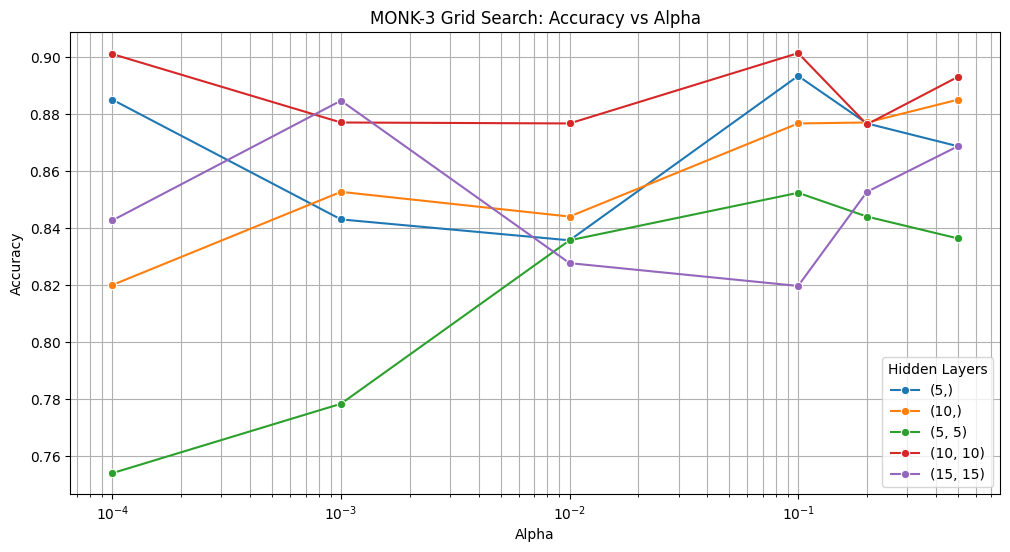

In [54]:
# 3. Initialize GridSearchCV
# cv=5: uses 5-fold cross-validation
# n_jobs=-1: uses all available CPU cores
grid_search_3 = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

print("Starting Grid Search... this may take a moment.")
grid_search_3.fit(X_train_3, y_train_3)

print("\nBest Parameters found:")
print(grid_search_3.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search_3.best_score_:.2%}")

visualize_results(pd.DataFrame(grid_search_3.cv_results_), "MONK-3 Grid Search")

In [56]:
# Use the best model found to predict on the test set
best_model_3 = grid_search_3.best_estimator_
test_predictions_3 = best_model_3.predict(X_test_3)
test_acc = accuracy_score(y_test_3, test_predictions_3)

print(f"Test Set Accuracy with Best Params: {test_acc:.2%}")

# Optional: Verify performance on training set (should be near 100% for this problem)
train_acc = accuracy_score(y_train_3, best_model_3.predict(X_train_3))
print(f"Train Set Accuracy: {train_acc:.2%}")

Test Set Accuracy with Best Params: 93.75%
Train Set Accuracy: 100.00%
